# Minería de Datos: Preprocesamiento y Clasificación - DATCOM - 23/24


In [2]:
# Importaciones para manejo de datos y dataframes
import numpy as np
from numpy.random import seed
import pandas as pd

# Importaciones para manejo de archivos y llamadas al OS
import os as os
import warnings

# Importaciones para manejo de gráficos
import pylab as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor



# No mostrar warnings de versiones anteriores
warnings.filterwarnings('ignore')

El preprocesamiento está un poco feillo, pero se ha realizado por encima:
- Encoders de Variables categóricas (Salvo el target, hacer labelencoder si se desea)
- Imputación de valores con knn para train y test
- Análisis exploratorio variado, la mayor parte sobre la parte de test, lo suyo sería analizar también la unión de train y test (pero test no tiene la variable target).

Cualquier cosa, error, o mejora, libres de modificar cualquier tema.

<br/>

### Análisis Exploratorio de Datos

In [4]:
# Cargamos csv con los datos de train
df_train = pd.read_csv("../data_raw/training_data.csv", sep=",", header=0, na_values=['?', '', 'NA'])
# Cargamos csv con los datos de test
df_test = pd.read_csv("../data_raw/test_data.csv", sep=",", header=0, na_values=['?', '', 'NA'])

# Dimensión
print(f"Dimensión del dataset de train:\n {df_train.shape} \n")
print(f"Dimensión del dataset de test:\n {df_test.shape} \n")

# Descripción de las variables
print("Descripción de las variables:\n")
df_train.info()

Dimensión del dataset de train:
 (906, 41) 

Dimensión del dataset de test:
 (389, 40) 

Descripción de las variables:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      906 non-null    int64  
 1   X1      906 non-null    int64  
 2   X2      906 non-null    int64  
 3   X3      906 non-null    int64  
 4   X4      649 non-null    float64
 5   X5      906 non-null    int64  
 6   X6      906 non-null    float64
 7   X7      906 non-null    int64  
 8   X8      906 non-null    float64
 9   X9      906 non-null    float64
 10  X10     906 non-null    float64
 11  X11     906 non-null    float64
 12  X12     906 non-null    float64
 13  X13     906 non-null    float64
 14  X14     906 non-null    float64
 15  X15     906 non-null    float64
 16  X16     906 non-null    float64
 17  X17     906 non-null    float64
 18  X18     906 non-null    float6

In [5]:
# Estadísticos
df_train.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X29,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,906.000000,9.060000e+02,9.060000e+02,9.060000e+02,6.490000e+02,9.060000e+02,9.060000e+02,9.060000e+02,9.060000e+02,906.000000,...,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,633.944812,3.448471e+08,1.409140e+08,2.296191e+08,1.679259e+08,3.226934e+08,7.095014e+04,1.834239e+08,2.789998e+06,427.673411,...,1.652058,-2.698231,-0.769670,-6.350003,53.262748,33.762481,19.367833,-6.144963,1.868517,0.042568
std,373.158757,1.011299e+09,4.666272e+08,7.688567e+08,5.322081e+08,9.703791e+08,2.430574e+05,5.380475e+08,1.856681e+07,413.669360,...,3.985377,118.955157,14.969628,49.989149,125.833097,152.764154,15.178570,37.857308,1.920547,0.272180
min,1.000000,4.871587e+06,6.290500e+04,6.277080e+05,1.918500e+04,1.279735e+06,-3.755140e+05,1.158190e+05,4.940000e+02,19.900000,...,0.001800,-1291.330069,-59.883345,-390.835713,-405.450000,-716.824525,-31.590958,-192.898018,0.176400,-2.007800
25%,314.500000,2.871623e+07,5.093032e+06,1.127887e+07,1.434103e+07,2.302948e+07,3.216390e+03,1.071942e+07,9.595350e+04,177.312500,...,0.248725,-8.285000,-3.325000,-5.322500,-1.855000,-19.915000,10.202500,-4.857500,1.019350,-0.033850
50%,617.500000,5.905216e+07,1.601310e+07,2.742359e+07,3.163625e+07,5.728552e+07,1.003438e+04,2.372510e+07,2.280075e+05,297.855000,...,0.754900,0.870000,2.665000,5.410000,33.670000,24.490000,15.855000,3.355000,1.409100,0.064700
75%,956.750000,1.825440e+08,5.803176e+07,9.499336e+07,8.599445e+07,1.707424e+08,3.388975e+04,7.744330e+07,6.547442e+05,511.952500,...,1.752250,5.030000,6.915000,12.762500,83.007500,79.115000,24.372500,8.807500,2.070850,0.155850
max,1295.000000,7.254477e+09,3.540379e+09,5.955596e+09,4.242837e+09,6.869245e+09,2.000147e+06,3.313859e+09,2.679355e+08,2882.360000,...,68.216900,1258.422867,57.725415,244.140000,787.504217,791.913297,69.717079,175.266141,33.602300,3.947700


In [6]:
# Valores únicos.
print(df_train.nunique())

ID      906
X1      896
X2      898
X3      897
X4      645
X5      897
X6      900
X7      894
X8      903
X9      898
X10     901
X11     902
X12     769
X13      65
X14     760
X15     865
X16     588
X17     722
X18     544
X19     580
X20     860
X21     652
X22     853
X23     806
X24       5
X25       2
X26     867
X27     793
X28     832
X29     886
X30       6
X31     800
X32     759
X33     834
X34     885
X35     888
X36     799
X37     782
X38     883
X39     834
RATE      4
dtype: int64


<br/>

### Missing values

In [7]:
# Missing values para TRAIN
print(f"Total missing values por variable TRAIN:\n{df_train.isnull().sum(axis=0)}")

Total missing values por variable TRAIN:
ID        0
X1        0
X2        0
X3        0
X4      257
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
X15       0
X16       0
X17       0
X18       0
X19       0
X20       0
X21     121
X22       0
X23       0
X24       0
X25       0
X26       0
X27       0
X28       0
X29       0
X30       0
X31       0
X32       0
X33       0
X34       0
X35       0
X36       0
X37       0
X38       0
X39       0
RATE      0
dtype: int64


In [8]:
# Missing values para TEST
print(f"Total missing values por variable TEST:\n{df_test.isnull().sum(axis=0)}")

Total missing values por variable TEST:
ID       0
X1       0
X2       0
X3       0
X4     111
X5       0
X6       0
X7       0
X8       0
X9       0
X10      0
X11      0
X12      0
X13      0
X14      0
X15      0
X16      0
X17      0
X18      0
X19      0
X20      0
X21     45
X22      0
X23      0
X24      0
X25      0
X26      0
X27      0
X28      0
X29      0
X30      0
X31      0
X32      0
X33      0
X34      0
X35      0
X36      0
X37      0
X38      0
X39      0
dtype: int64


In [9]:
# Ratio Missing values para TRAIN
ratio_nulos_train = df_train.isnull().sum()/df_train.shape[0]
ratio_nulos_train


ID      0.000000
X1      0.000000
X2      0.000000
X3      0.000000
X4      0.283664
X5      0.000000
X6      0.000000
X7      0.000000
X8      0.000000
X9      0.000000
X10     0.000000
X11     0.000000
X12     0.000000
X13     0.000000
X14     0.000000
X15     0.000000
X16     0.000000
X17     0.000000
X18     0.000000
X19     0.000000
X20     0.000000
X21     0.133554
X22     0.000000
X23     0.000000
X24     0.000000
X25     0.000000
X26     0.000000
X27     0.000000
X28     0.000000
X29     0.000000
X30     0.000000
X31     0.000000
X32     0.000000
X33     0.000000
X34     0.000000
X35     0.000000
X36     0.000000
X37     0.000000
X38     0.000000
X39     0.000000
RATE    0.000000
dtype: float64

In [10]:
# Ratio Missing values para TEST
ratio_nulos_test = df_test.isnull().sum()/df_test.shape[0]
ratio_nulos_test

ID     0.000000
X1     0.000000
X2     0.000000
X3     0.000000
X4     0.285347
X5     0.000000
X6     0.000000
X7     0.000000
X8     0.000000
X9     0.000000
X10    0.000000
X11    0.000000
X12    0.000000
X13    0.000000
X14    0.000000
X15    0.000000
X16    0.000000
X17    0.000000
X18    0.000000
X19    0.000000
X20    0.000000
X21    0.115681
X22    0.000000
X23    0.000000
X24    0.000000
X25    0.000000
X26    0.000000
X27    0.000000
X28    0.000000
X29    0.000000
X30    0.000000
X31    0.000000
X32    0.000000
X33    0.000000
X34    0.000000
X35    0.000000
X36    0.000000
X37    0.000000
X38    0.000000
X39    0.000000
dtype: float64

Tenemos un 28,5 % de nulos en X4, quizás sí es conveniente imputar....o no sé, la quitamos si eso.
En la X21 solo 11% esta sí la imputamos.

<br/>

### Encoding

In [11]:
#CATEGÓRICAS: X24, X25, X30, RATE 

# X24 -> Factor ordenado (VLOW, LOW, MED, HIGH, VHIGH) -> LabelEncoder
# X25 -> Binario (YES, NO) -> LabelEncoder NO -> 0, YES -> 1. (Da un poco igual si es 0,1 o 1,2 la verdad)
# X30 -> ASKVR, CLPXZ, GXZVX, KUHMP, VTKGN, XNHTQ -> OneHotEncoder

# Ninguna presenta nulos, aplicamos las transformaciones y posteriormente imputación de NAs
# ------------------------------------------------------------------------------------------------------


df_train_num = df_train.copy()
df_test_num = df_test.copy()

# 1. "OrdinalEncoder" para X24
orden_x24 = ['VLOW', 'LOW', 'MED', 'HIGH', 'VHIGH']

ordinal_encoder_x24 = OrdinalEncoder(categories=[orden_x24], dtype=int)

df_train_num['X24'] = ordinal_encoder_x24.fit_transform(df_train_num[['X24']])
df_test_num['X24'] = ordinal_encoder_x24.transform(df_test_num[['X24']])

# 2. "OrdinalEncoder" para X25
orden_x25 = ['NO', 'YES']

ordinal_encoder_x25 = OrdinalEncoder(categories=[orden_x25], dtype=int)

df_train_num['X25'] = ordinal_encoder_x25.fit_transform(df_train_num[['X25']])
df_test_num['X25'] = ordinal_encoder_x25.transform(df_test_num[['X25']])


# Si es VTKGN 1 else 0
# Ya que la la clase está muy desbalanceada
df_train_encoded = df_train_num.copy()
df_test_encoded = df_test_num.copy()

df_train_encoded.loc[df_train_num['X30'] == 'VTKGN', 'X30'] = 1
df_train_encoded.loc[df_train_num['X30'] != 'VTKGN', 'X30'] = 0

df_test_encoded.loc[df_test_num['X30'] == 'VTKGN', 'X30'] = 1
df_test_encoded.loc[df_test_num['X30'] != 'VTKGN', 'X30'] = 0

# df_train_encoded['X30'].astype(int)
# df_test_encoded['X30'].astype(int)

# #3. "OneHotEncoder" para X30

# one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int32)
# col_encoded = one_hot_encoder.fit_transform(df_train_num[["X30"]])
# df_train_encoded = pd.concat([df_train_num, pd.DataFrame(col_encoded, columns=one_hot_encoder.get_feature_names_out(['X30']))], axis=1)

# one_hot_encoder_test = OneHotEncoder(sparse=False, dtype=np.int32)
# col_encoded_test = one_hot_encoder_test.fit_transform(df_train_num[["X30"]]) # ponemos train porque test no tiene todas las distintas categorias
# df_test_encoded = pd.concat([df_test_num, pd.DataFrame(col_encoded_test, columns=one_hot_encoder_test.get_feature_names_out(['X30']))], axis=1)


# Eliminamos original
# df_train_encoded.head()
# df_test_encoded.head()

df_train_encoded['X30'] = pd.to_numeric(df_train_encoded['X30'])
df_test_encoded['X30'] = pd.to_numeric(df_train_encoded['X30']) 



<br/>

### Outliers

In [13]:
# Vamos a ver los outliers primero, ya que si imputamos es posible que si no hemos eliminado outliers (en caso de que los eliminemos) estos afecten a la imputación si usamos la media, o knn.
# Igualmente, lo más seguro es que no eliminemos outliers.

# OJO! -> Estoy quitando NAs, para los outliers no pasa nada, ya que si se hace tras la imputación será igual o peor, mejor estudiarlos antes de imputar, por si hay que eliminar.

# Quitamos variable objetivo y NAs
df_train_enc_no_target_no_na = df_train_encoded.drop(['ID','RATE'],axis=1, inplace=False).dropna(axis=0, inplace=False)
# Quitamos variables del OneHotEncoder porque no nos sirve para nada ahora mismo
df_train_enc_no_target_no_na = df_train_enc_no_target_no_na[df_train_enc_no_target_no_na.columns]
# Renombramos porque es un coñazo de largo el nombre
df = df_train_enc_no_target_no_na

cuartiles = df.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)
iqr = cuartiles.loc[0.75] - cuartiles.loc[0.25]
limits_iqr = pd.DataFrame({'inf': cuartiles.loc[0.25] - 1.5*iqr, 
                         'max':cuartiles.loc[0.75] + 1.5*iqr,
                         'inf_extr': cuartiles.loc[0.25] - 3*iqr, 
                         'max_extr':cuartiles.loc[0.75] + 3*iqr })
#rangos = pd.DataFrame({'inf': cuartiles.loc['0.75'] - cuartiles.loc['0.25']})
#print(cuartiles)
#print(iqr)
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 905
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      561 non-null    int64  
 1   X2      561 non-null    int64  
 2   X3      561 non-null    int64  
 3   X4      561 non-null    float64
 4   X5      561 non-null    int64  
 5   X6      561 non-null    float64
 6   X7      561 non-null    int64  
 7   X8      561 non-null    float64
 8   X9      561 non-null    float64
 9   X10     561 non-null    float64
 10  X11     561 non-null    float64
 11  X12     561 non-null    float64
 12  X13     561 non-null    float64
 13  X14     561 non-null    float64
 14  X15     561 non-null    float64
 15  X16     561 non-null    float64
 16  X17     561 non-null    float64
 17  X18     561 non-null    float64
 18  X19     561 non-null    float64
 19  X20     561 non-null    float64
 20  X21     561 non-null    float64
 21  X22     561 non-null    float64
 22  X23    

In [285]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,15502828,395185,2432028,10560043.0,25271554,2488.07,4942785,112153.0,765.80,52543.0,...,1,-1.53,1.35,1.98,2.08,12.25,10.21,1.22,4.4206,-0.2186
1,142798094,41704189,55100678,87061505.0,182798367,36247.47,55736589,263186.0,626.02,20570001.0,...,1,13.59,14.67,25.12,82.71,78.71,18.30,10.71,1.8797,0.1190
3,37158119,2421374,6262830,19428247.0,33602057,6950.75,17729872,82913.0,294.75,2913511.0,...,1,18.02,6.56,11.75,20.89,16.13,20.88,6.69,3.3327,0.0135
5,197083121,28919915,69671527,95350232.0,312395715,24516.56,101732889,1240116.0,490.42,13828001.0,...,1,7.42,3.43,6.78,48.87,31.39,12.95,2.84,1.4334,0.0931
7,31380586,966560,12601695,5965860.0,22173819,275.32,25414726,103916.0,764.61,-1546919.0,...,1,-3.33,-11.29,-51.12,-27.51,-73.82,22.38,-18.72,1.9663,0.0256


In [33]:
# Con los límites del IQR para cada variable calculados, podemos filtrar y quedarnos con aquellos considerados outliers para cada variable.
# Esto y lo anterior se pueden poner en funciones aparte. 

for i in df:
    inf = limits_iqr.loc[i,'inf']
    max = limits_iqr.loc[i,'max']
    inf_extr = limits_iqr.loc[i,'inf_extr']
    max_extr = limits_iqr.loc[i,'max_extr']
    
    tmp = df[ (df[i] < inf) | (df[i] > max)].copy()
    tmp_extr = df[ (df[i] < inf_extr) | (df[i] > max_extr)].copy()
    
    if(not tmp.empty):
        #print(f"ouliers de {i}: {tmp.index}")
        #print(f"ouliers extremos de {i}: {tmp_extr.index}")
        print(f"Porcentaje de outliers de {i}: {round(tmp.shape[0]/df.shape[0]*100 ,2)} %")
        print(f"Porcentaje de outliers extremos de {i}: {round(tmp_extr.shape[0]/df.shape[0]*100,2)} %\n")

Porcentaje de outliers de X1: 12.3 %
Porcentaje de outliers extremos de X1: 9.45 %

Porcentaje de outliers de X2: 13.37 %
Porcentaje de outliers extremos de X2: 9.63 %

Porcentaje de outliers de X3: 13.9 %
Porcentaje de outliers extremos de X3: 9.27 %

Porcentaje de outliers de X4: 13.01 %
Porcentaje de outliers extremos de X4: 9.8 %

Porcentaje de outliers de X5: 12.83 %
Porcentaje de outliers extremos de X5: 9.27 %

Porcentaje de outliers de X6: 14.26 %
Porcentaje de outliers extremos de X6: 9.27 %

Porcentaje de outliers de X7: 15.69 %
Porcentaje de outliers extremos de X7: 11.94 %

Porcentaje de outliers de X8: 14.62 %
Porcentaje de outliers extremos de X8: 9.98 %

Porcentaje de outliers de X9: 7.13 %
Porcentaje de outliers extremos de X9: 2.85 %

Porcentaje de outliers de X10: 14.26 %
Porcentaje de outliers extremos de X10: 9.09 %

Porcentaje de outliers de X11: 19.25 %
Porcentaje de outliers extremos de X11: 13.01 %

Porcentaje de outliers de X12: 16.93 %
Porcentaje de outliers e

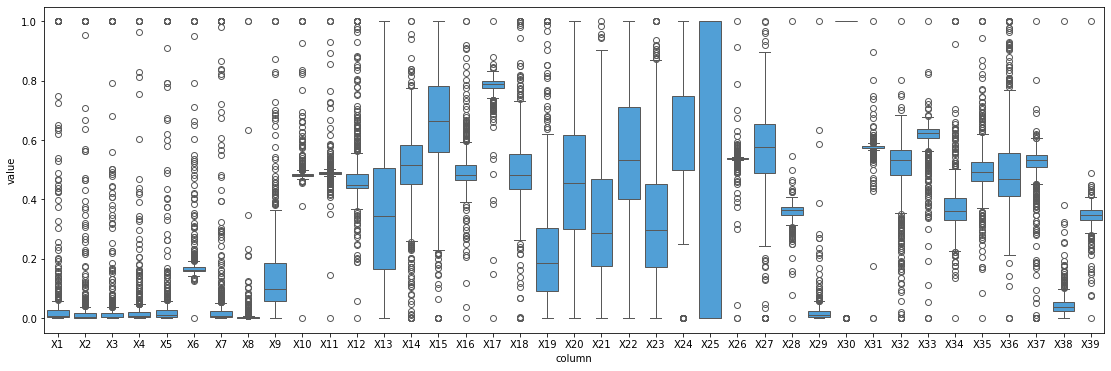

In [34]:
# Visualizamos de forma gráfica con boxplot
# Escalamos con minmaxscaler, para que los gráficos estén en la misma escala, aunque no es obligatorio para ver boxplots


scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled,index=df.index, columns=[
  df_train_enc_no_target_no_na.columns])

df_melted = df_scaled.melt(var_name='column')

plt.figure(figsize=(19,6))
sns.boxplot(data=df_melted, color="#3BA3EC", x="column", y="value")


# Creamos FacetGrid igual
#g = sns.FacetGrid(df_melted, col="column", col_wrap=4,sharex=False, sharey=False,
#                  height=3, aspect=1)
# Mapeamos los boxplot
#g.map(sns.boxplot, "column", "value", width=0.5, color="#3BA3EC")

# Ajusta el espacio entre los gráficos
#g.fig.tight_layout(pad=3)

# Muestra los gráficos
plt.show()

El mayor % de outliers extremos está en X26 que tiene un 16% de outliers extremos.

<br/>

### PCA

In [35]:
# Hacemos pca para mejor representación en 2D y ver outliers tb.

# OJO! -> se está obteniendo pca sin NAs, solo por ver el scatterplot como queda.

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled)

pca_df_scaled = pd.DataFrame(data=pca_features, columns =['PC1','PC2'])
print(pca.explained_variance_ratio_)

[0.30374797 0.16765934]


Entre las dos componentes principales apenas se llega al 50% de explicabilidad, pero nos puede servir para ver agrupaciones y outliers

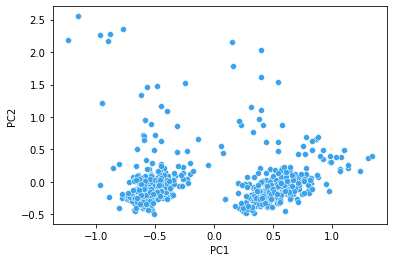

In [36]:
# Representamos el pca en 2D
sns.scatterplot(pca_df_scaled,x="PC1",y="PC2", color="#3BA3EC")
plt.show()

## Quitando Outliers

In [37]:
# Partimos del dataset al que le hemos aplicado los diferentes encoders
# df_train_encoded para archivo train
# df_test_encoded para archivo test

# Solo quitamos outliers del de train, ya que el de test habrá que usarlo para validar y subir la predicción a kaggle.

# Neceistamos ID, RATE por separado, para escalar y quitar outliers sin que influyan estos parámetros 
df_train_no_target = df_train_encoded.drop(['ID','RATE'], inplace=False, axis=1).dropna(axis=0, inplace=False)

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_train_no_target.to_numpy())
df_scaled = pd.DataFrame(df_scaled,index=df_train_no_target.index, columns=[
  df_train_no_target.columns])



In [38]:
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(df_scaled)
X_scores = lof.negative_outlier_factor_

<AxesSubplot:>

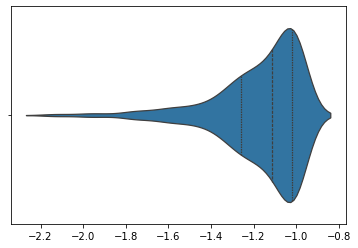

In [39]:
sns.violinplot(x=X_scores, inner="quart")

In [40]:
pd.DataFrame(X_scores).describe()

,0
count,561.000000
mean,-1.173998
std,0.210231
min,-2.150230
25%,-1.260015
50%,-1.112248
75%,-1.020352
max,-0.958119


In [41]:
iqr = np.quantile(X_scores, 0.75) - np.quantile(X_scores, 0.25)

print("The LOF error score has an IQR of {:.4f}".format(iqr))

cutoff_value = np.quantile(X_scores, 0.25) - (1.5 * iqr)

print("The cutouff value to remove outliers using LOF is {:.4f}".format(cutoff_value))

The LOF error score has an IQR of 0.2397
The cutouff value to remove outliers using LOF is -1.6195


In [42]:
# Sacamos los índices de los outliers
df_outliers = df_scaled[X_scores <= cutoff_value]

# Quitamos estos índices al df encoded
df = df_train_encoded.drop(df_outliers.index, axis=0, inplace=False)

In [43]:
print("With a cutoff value of {:.4f}, a total of {} samples have been removed.".format(cutoff_value,(df_outliers.shape[0])))
print("{:.4f}% of the original data remains.".format((df.shape[0] / df_train_encoded.shape[0])*100))

With a cutoff value of -1.6195, a total of 27 samples have been removed.
97.0199% of the original data remains.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 0 to 905
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      879 non-null    int64  
 1   X1      879 non-null    int64  
 2   X2      879 non-null    int64  
 3   X3      879 non-null    int64  
 4   X4      622 non-null    float64
 5   X5      879 non-null    int64  
 6   X6      879 non-null    float64
 7   X7      879 non-null    int64  
 8   X8      879 non-null    float64
 9   X9      879 non-null    float64
 10  X10     879 non-null    float64
 11  X11     879 non-null    float64
 12  X12     879 non-null    float64
 13  X13     879 non-null    float64
 14  X14     879 non-null    float64
 15  X15     879 non-null    float64
 16  X16     879 non-null    float64
 17  X17     879 non-null    float64
 18  X18     879 non-null    float64
 19  X19     879 non-null    float64
 20  X20     879 non-null    float64
 21  X21     758 non-null    float64
 22  X22    

<br/>

### Imputación de Missing Values

In [86]:
# Imputando con KNN (TRAIN)
df= df_train_encoded
df_final_train = df.drop(['ID','RATE'], axis=1, inplace=False)
train_ID = df['ID'].copy()
train_RATE = df['RATE'].copy()


# scalamos definitivamente
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_final_train.to_numpy())
df_scaled = pd.DataFrame(df_scaled,index=df_final_train.index, columns=[
  df_final_train.columns])

Knn_imp_train = KNNImputer(n_neighbors=7).fit(df_scaled)
imputed_X_train = pd.DataFrame(Knn_imp_train.transform(df_scaled), columns=df_scaled.columns)

result_df_train = pd.merge(train_ID, imputed_X_train, left_index=True, right_index=True)
result_df_train = pd.merge(result_df_train, train_RATE, left_index=True, right_index=True)
result_df_train.columns = df.columns
# vemos ratio de nulos ahora
ratio_nulos_train_result = result_df_train.isnull().sum()/result_df_train.shape[0]
ratio_nulos_train_result



ID      0.0
X1      0.0
X2      0.0
X3      0.0
X4      0.0
X5      0.0
X6      0.0
X7      0.0
X8      0.0
X9      0.0
X10     0.0
X11     0.0
X12     0.0
X13     0.0
X14     0.0
X15     0.0
X16     0.0
X17     0.0
X18     0.0
X19     0.0
X20     0.0
X21     0.0
X22     0.0
X23     0.0
X24     0.0
X25     0.0
X26     0.0
X27     0.0
X28     0.0
X29     0.0
X30     0.0
X31     0.0
X32     0.0
X33     0.0
X34     0.0
X35     0.0
X36     0.0
X37     0.0
X38     0.0
X39     0.0
RATE    0.0
dtype: float64

In [87]:
# Imputando con KNN (TEST)

df_final_test = df_test_encoded.drop('ID', axis=1, inplace=False)
test_ID = df_test_encoded['ID'].copy()

# scalamos definitivamente
df_scaled = scaler.transform(df_final_test.to_numpy())
df_scaled = pd.DataFrame(df_scaled,index=df_final_test.index, columns=[
  df_final_test.columns])

Knn_imp_test = KNNImputer(n_neighbors=7).fit(df_scaled)
imputed_X_test = pd.DataFrame(Knn_imp_test.transform(df_scaled), columns=df_scaled.columns)

result_df_test = pd.merge(test_ID, imputed_X_test, left_index=True, right_index=True)
result_df_test.columns = df_test_encoded.columns
# vemos ratio de nulos ahora
ratio_nulos_test_result = result_df_test.isnull().sum()/result_df_test.shape[0]
ratio_nulos_test_result

result_df_test.head()


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,656,0.555950,-0.112153,0.239747,0.221551,0.382578,0.644106,0.346975,-0.170607,-0.328936,...,0.0,-0.361247,0.582520,0.424661,2.389984,3.973644,-0.154905,0.829491,0.919163,0.347918
1,174,-0.268238,-0.074066,-0.152616,-0.266183,-0.339193,-0.142937,-0.277244,0.841353,-0.808765,...,0.0,-0.455877,0.161621,0.039259,-0.132450,0.051702,-0.185956,0.810465,-0.245364,-0.031102
2,129,-0.037842,0.169013,0.140273,-0.156743,-0.270784,-0.015664,0.136397,0.215525,-0.601467,...,0.0,-0.094630,-0.170410,-0.158142,-0.379084,-0.720489,1.062456,-1.134651,-0.292154,-0.210332
3,674,-0.107332,0.082872,-0.073143,-0.301705,-0.186318,-0.153186,0.131862,-0.371088,-0.485791,...,0.0,-0.223808,-1.458496,-2.831075,-0.627014,-0.874180,-0.869090,-1.708379,-0.166239,-0.770691
4,197,0.163277,0.543362,0.265169,0.392009,-0.112228,0.117485,0.010769,-0.176095,0.004378,...,0.0,0.941044,0.349121,0.181919,0.378848,0.418661,0.438603,0.983169,0.027009,0.144966


## Seleccion de caracteristicas

In [88]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression(max_iter=100000)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(result_df_train.iloc[:,1:40],result_df_train.iloc[:,40] )
rfecv.feature_names_in_

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 24


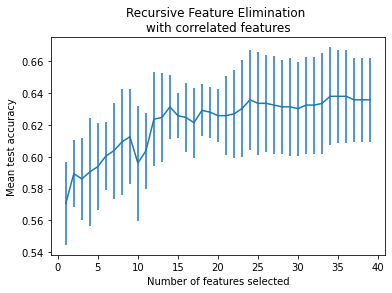

In [85]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [59]:
final_columns=rfecv.get_feature_names_out()
final_columns_train=np.append(np.array(["ID"]),final_columns)
final_columns_train=np.append(final_columns_train,np.array(["RATE"]))
final_columns_test=np.append(np.array(["ID"]),final_columns)
final_train=result_df_train.loc[:,final_columns_train]
final_test=result_df_test.loc[:,final_columns_test]

In [60]:
final_train

,ID,X1,X4,X5,X7,X9,X13,X14,X15,X16,...,X25,X27,X30,X32,X34,X35,X36,X38,X39,RATE
0,102,-0.283105,-0.294141,-0.216731,-0.281493,1.398353,-0.434783,-0.455000,0.455889,-0.411449,...,0,-1.763188,0,-0.128418,-0.372249,-0.123599,-0.398377,2.864004,-1.493411,B
1,343,0.544414,0.773519,0.849708,0.479761,0.980651,0.086957,1.215000,0.117917,0.075134,...,1,0.503571,0,1.172363,0.577876,0.547511,0.172548,0.447551,0.286241,B
2,407,-0.109076,-0.182473,-0.165846,-0.000198,-0.310319,0.434783,-0.023889,0.077177,0.132379,...,0,-0.323889,0,0.312988,0.023685,0.606281,-0.260056,-0.246029,-0.581444,B
3,950,-0.142328,-0.170376,-0.160334,-0.089851,-0.009279,0.521739,0.451667,-0.587864,-0.100179,...,0,-0.652845,0,0.380371,-0.150597,-0.084419,0.354622,1.829387,-0.269900,D
4,848,-0.248911,-0.301795,-0.314106,-0.194442,-0.252107,-0.608696,0.019444,-0.126237,0.354204,...,0,-0.386547,0,0.637207,0.081308,0.565182,0.422371,-0.551973,-0.319979,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,89,0.538190,0.617877,0.188801,0.632552,-0.171094,1.565217,-0.627222,0.324200,0.393560,...,0,-0.162635,0,-0.395996,-0.921962,-1.023932,-0.772406,-0.556728,-0.077491,B
902,571,-0.310287,-0.314977,-0.357120,-0.321784,-0.551324,-0.782609,-2.173889,0.358342,-1.649374,...,0,-1.068417,0,-1.835449,-0.948475,-0.761183,-0.549400,1.338374,-0.798629,C
903,953,3.470347,0.830079,2.029403,7.164578,0.278583,0.739130,-0.223889,-2.251327,3.191413,...,0,-0.041926,-1,-1.253418,-0.336309,-0.464607,-0.245236,0.029291,-0.187665,D
904,274,-0.029073,-0.125599,-0.283810,-0.229721,-0.476467,-0.521739,-2.563889,0.978626,-1.499106,...,0,-1.537434,0,-2.270996,-2.246222,-1.987983,0.368031,0.017309,-1.425936,D


<br/>

### Correlación entre variables tras imputación

Text(0.5, 1.0, 'Correlation Heatmap')

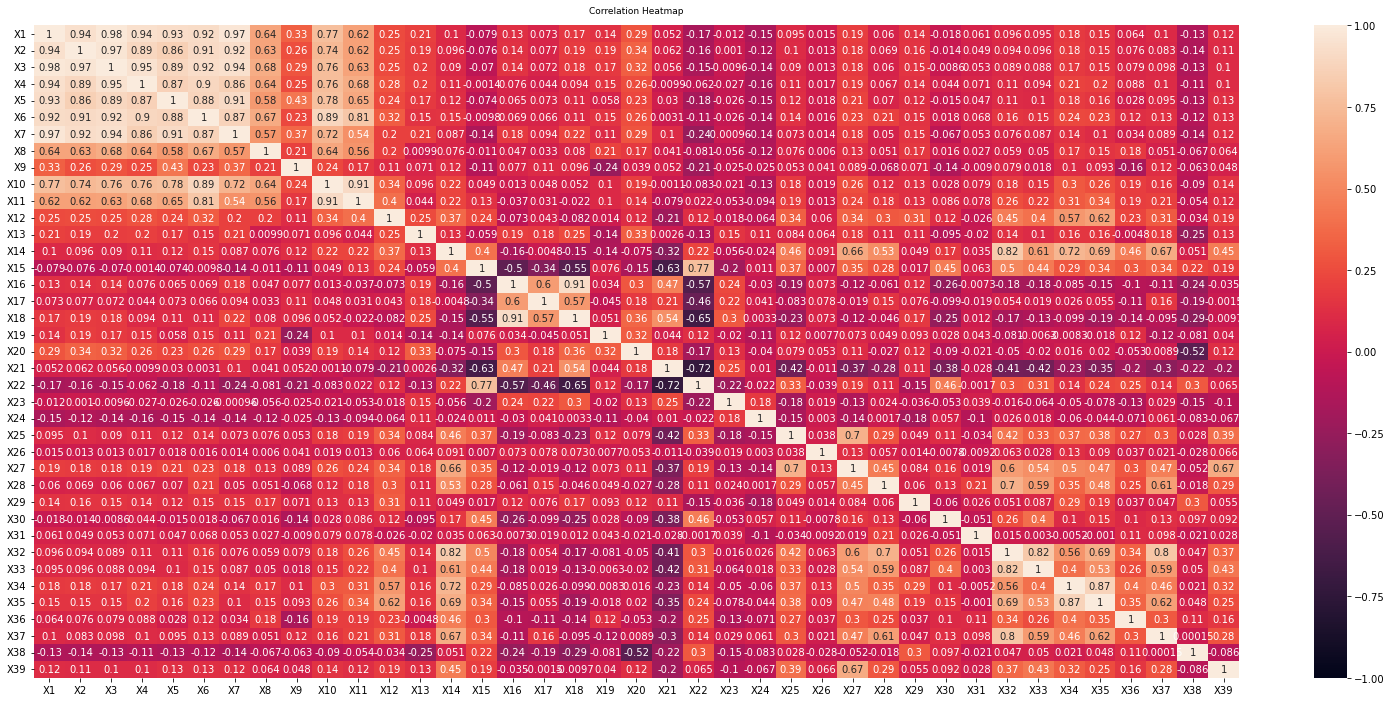

In [17]:
# Increase the size of the heatmap.
plt.figure(figsize=(27,12))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(result_df_train.drop(['ID','RATE'],axis=1, inplace=False).corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':9}, pad=12)

# Esto no es interpretable ni por asomo. Las variables X1 a X7 están bastante correlacionadas entre ellas.
# Es posible que la Extracción de características la haga cada uno, en función de su algoritmo. 

<br/>

### Exportación a carpeta de Preprocesamiento

In [61]:
# Conversión de aquellas que eran enteros a enteros tras imputación knn

result_df_train['X25'] = result_df_train['X25'].astype('int')
result_df_train['X30'] = result_df_train['X30'].astype('int')
result_df_test['X25'] = result_df_test['X25'].astype('int')
result_df_test['X30'] = result_df_test['X30'].astype('int')


In [62]:
final_train['X25'] = final_train['X25'].astype('int')
final_train['X30'] = final_train['X30'].astype('int')
final_test['X25'] = final_test['X25'].astype('int')
final_test['X30'] = final_test['X30'].astype('int')

In [63]:
final_train.head(20)

,ID,X1,X4,X5,X7,X9,X13,X14,X15,X16,...,X25,X27,X30,X32,X34,X35,X36,X38,X39,RATE
0,102,-0.283105,-0.294141,-0.216731,-0.281493,1.398353,-0.434783,-0.455000,0.455889,-0.411449,...,0,-1.763188,0,-0.128418,-0.372249,-0.123599,-0.398377,2.864004,-1.493411,B
1,343,0.544414,0.773519,0.849708,0.479761,0.980651,0.086957,1.215000,0.117917,0.075134,...,1,0.503571,0,1.172363,0.577876,0.547511,0.172548,0.447551,0.286241,B
2,407,-0.109076,-0.182473,-0.165846,-0.000198,-0.310319,0.434783,-0.023889,0.077177,0.132379,...,0,-0.323889,0,0.312988,0.023685,0.606281,-0.260056,-0.246029,-0.581444,B
3,950,-0.142328,-0.170376,-0.160334,-0.089851,-0.009279,0.521739,0.451667,-0.587864,-0.100179,...,0,-0.652845,0,0.380371,-0.150597,-0.084419,0.354622,1.829387,-0.269900,D
4,848,-0.248911,-0.301795,-0.314106,-0.194442,-0.252107,-0.608696,0.019444,-0.126237,0.354204,...,0,-0.386547,0,0.637207,0.081308,0.565182,0.422371,-0.551973,-0.319979,C
5,101,0.897309,0.889197,1.727068,1.169113,0.575439,0.173913,0.310556,-0.019222,-0.082290,...,0,-0.604008,0,0.074707,0.179113,0.069676,-0.205011,0.023110,0.149710,C
6,372,-0.297866,-0.102672,-0.337329,-0.326011,-0.359476,-0.608696,0.797222,0.500932,0.246869,...,1,1.071182,0,0.665527,0.122316,0.151065,2.293225,0.350737,0.612546,C
7,287,-0.179887,-0.358258,-0.237702,0.025323,1.394797,-0.130435,-1.030556,-1.064984,1.309481,...,0,-1.871919,0,-1.362793,-0.720931,-0.992729,0.460480,0.529910,-0.206115,D
8,540,1.253755,2.644514,0.818970,0.105878,-0.458388,0.434783,0.660556,1.307416,-1.373882,...,1,0.396683,0,0.694824,1.780999,2.497627,0.238179,0.495102,0.069056,A
9,75,-0.218333,-0.315954,-0.353556,-0.108742,-0.685707,-0.260870,-3.395000,-1.606656,2.146691,...,0,-1.753052,0,-4.226074,-0.952835,-0.993638,-3.348339,0.715169,-1.590933,C


In [65]:
final_test.head(20)

,ID,X1,X4,X5,X7,X9,X13,X14,X15,X16,...,X24,X25,X27,X30,X32,X34,X35,X36,X38,X39
0,656,0.555950,0.221551,0.382578,0.346975,-0.328936,0.478261,0.438333,0.709224,-1.302326,...,0.0,1,0.381018,0,0.582520,2.389984,3.973644,-0.154905,0.919163,0.347918
1,174,-0.268238,-0.266183,-0.339193,-0.277244,-0.808765,-0.217391,0.027222,0.301822,-1.073345,...,0.0,0,-0.158950,0,0.161621,-0.132450,0.051702,-0.185956,-0.245364,-0.031102
2,129,-0.037842,-0.156743,-0.270784,0.136397,-0.601467,-0.652174,-0.532778,-0.068857,2.883721,...,-2.0,0,-0.531214,0,-0.170410,-0.379084,-0.720489,1.062456,-0.292154,-0.210332
3,674,-0.107332,-0.301705,-0.186318,0.131862,-0.485791,0.000000,-0.926111,-0.982355,2.060823,...,0.0,0,-0.698917,0,-1.458496,-0.627014,-0.874180,-0.869090,-0.166239,-0.770691
4,197,0.163277,0.392009,-0.112228,0.010769,0.004378,0.434783,0.383889,0.558026,0.243292,...,0.0,1,0.502649,0,0.349121,0.378848,0.418661,0.438603,0.027009,0.144966
5,1213,-0.281437,-0.381450,-0.238958,-0.183889,-0.342502,-0.260870,-1.103889,-0.813370,0.060823,...,1.0,0,0.296245,0,-0.615723,-0.770776,-0.613854,-0.837332,-0.563005,0.285714
6,715,-0.269256,-0.375879,-0.313285,-0.161790,-0.547379,-0.608696,-3.896111,-0.801607,0.837209,...,2.0,0,-1.667358,0,-4.129395,-2.440654,-2.502676,0.438603,-0.758155,-4.629942
7,1083,-0.274889,0.021422,-0.212169,-0.247431,2.091935,0.652174,-0.257222,0.083776,-0.193202,...,1.0,0,-0.325731,0,-0.029785,-0.240860,-0.021711,-0.058927,0.428436,-0.206642
8,623,-0.207178,-0.120851,-0.234735,-0.292543,-0.485462,-0.260870,1.545000,1.059245,-0.769231,...,0.0,1,1.100668,0,1.378418,2.526676,2.584267,1.039873,1.827960,0.589879
9,1225,-0.179356,-0.321431,-0.311145,-0.013000,-0.420019,1.000000,-0.145000,-0.520155,2.468694,...,-1.0,0,-0.006911,0,0.385254,0.379555,1.901343,0.370854,-0.295863,0.413284


In [66]:

final_train.to_csv('../data_preprocess/train_preprocess.csv', index=False)
final_test.to_csv('../data_preprocess/test_preprocess.csv', index=False)